## Clustering Analysis

In [1]:
import pandas as pd
data = pd.read_csv('/base_data.csv') # 경로설정

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (143) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
data=data[data['Pass_Fail']=='FAIL']

In [3]:
data=data[['PD_Tan_2field', 'PD_Tan_4field','PD_Tan_6field', 'PD_Tan_8field']]

In [4]:
# 이상치 제거 함수 (1Q - 1.5*IQR, 3Q + 1.5*IQR 을 넘어가는 값을 가진 행을 제거)

import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)

    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight
  
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
  
    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
    return outlier_idx

In [5]:
# 함수 사용해서 이상치 값 삭제
outlier_idx = get_outlier(df=data, column='PD_Tan_2field', weight=1.5)
data.drop(outlier_idx, axis=0, inplace=True)

In [6]:
outlier_idx = get_outlier(df=data, column='PD_Tan_4field', weight=1.5)
data.drop(outlier_idx, axis=0, inplace=True)

In [7]:
outlier_idx = get_outlier(df=data, column='PD_Tan_6field', weight=1.5)
data.drop(outlier_idx, axis=0, inplace=True)

In [8]:
outlier_idx = get_outlier(df=data, column='PD_Tan_8field', weight=1.5)
data.drop(outlier_idx, axis=0, inplace=True)

In [9]:
#from sklearn.preprocessing import StandardScaler
#data = pd.DataFrame(StandardScaler().fit_transform(data), columns=data.columns, index = data.index)

In [10]:
data_1 = data # for Hierarchical clustering

In [11]:
data_2 = data # for K-means clustering

## 계층적 클러스터링(HIerarchical Clustering)

In [12]:
from scipy.cluster.hierarchy import linkage, dendrogram
clusters = linkage(y=data_1, method='complete', metric='euclidean')
clusters

# 연결방식 (method = 부분에 다음 중 선택할 수 있음)
# 1. single
# 2. complete
# 3. average
# 4. centroid
# 5. ward

array([[1.22000000e+02, 2.44000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.25000000e+02, 1.86000000e+02, 0.00000000e+00, 2.00000000e+00],
       [8.00000000e+01, 2.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       ...,
       [1.44160000e+04, 1.44180000e+04, 4.70927277e+01, 3.68000000e+03],
       [1.44170000e+04, 1.44190000e+04, 5.03368776e+01, 3.53200000e+03],
       [1.44200000e+04, 1.44210000e+04, 8.85279758e+01, 7.21200000e+03]])

In [13]:
pd.DataFrame(clusters)

,0,1,2,3
0,122.0,244.0,0.000000,2.0
1,125.0,186.0,0.000000,2.0
2,80.0,242.0,0.000000,2.0
3,128.0,203.0,0.000000,2.0
4,126.0,201.0,0.000000,2.0
...,...,...,...,...
7206,14412.0,14415.0,35.081316,3426.0
7207,14411.0,14414.0,36.525761,1939.0
7208,14416.0,14418.0,47.092728,3680.0
7209,14417.0,14419.0,50.336878,3532.0


In [14]:
clusters.shape

(7211, 4)

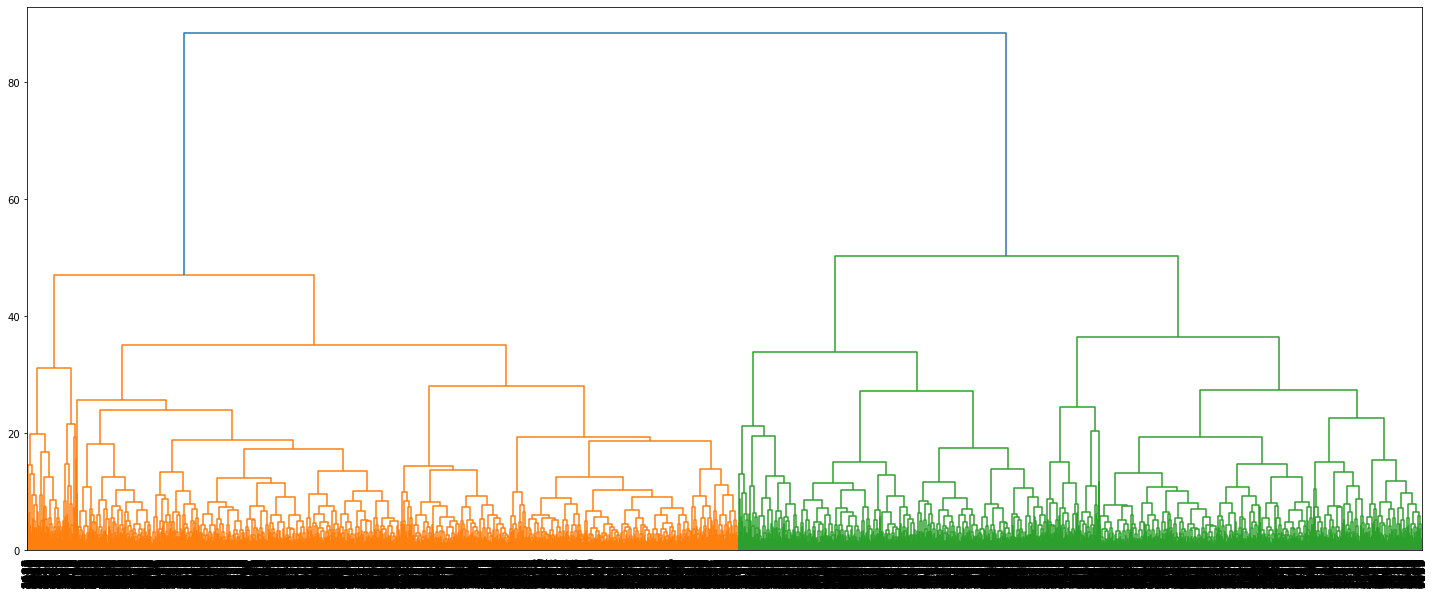

In [15]:
# 덴드로그램 시각화 : 군집수 결정
import matplotlib.pyplot as plt
plt.figure( figsize = (25, 10) )
dendrogram(clusters, leaf_rotation=90, leaf_font_size=12,)
# leaf_rotation=90 : 글자 각도
# leaf_font_size=20 : 글자 사이즈
plt.show()

In [16]:
from scipy.cluster.hierarchy import fcluster # 지정한 클러스터 자르기
cut_tree = fcluster(clusters, t=5, criterion='distance') # 본 실습에서는 6 (y축)에서 cut
cut_tree # prediction

array([131, 130, 135, ..., 254, 210,  49], dtype=int32)

In [17]:
data_1['hc_cluster'] = cut_tree
data_1

,PD_Tan_2field,PD_Tan_4field,PD_Tan_6field,PD_Tan_8field,hc_cluster
0,-4.500,-0.650,4.475,8.250,131
1,-4.350,-0.025,5.625,10.625,130
4,-3.925,-0.275,3.475,6.125,135
5,-4.225,-0.700,4.750,11.225,132
6,-4.300,-0.250,4.775,9.700,131
...,...,...,...,...,...
36893,-3.850,4.825,14.800,19.750,62
37012,1.500,7.850,4.050,4.925,104
37113,-0.075,5.400,-0.700,-13.100,254
37152,-0.600,3.775,-3.900,-18.250,210


In [18]:
data_1['hc_cluster'].value_counts()

141    106
146     86
206     80
123     75
91      75
      ... 
245      1
35       1
34       1
298      1
39       1
Name: hc_cluster, Length: 342, dtype: int64

In [19]:
# 군집별 통계(평균)
cluster_g = data_1.groupby('hc_cluster')
cluster_g.mean()

,PD_Tan_2field,PD_Tan_4field,PD_Tan_6field,PD_Tan_8field
hc_cluster,,,,
1,-0.455000,9.745000,25.815000,35.685000
2,-2.360000,6.055000,20.795000,35.775000
3,0.837500,11.025000,24.312500,32.287500
4,0.763889,11.725000,26.586111,29.500000
5,-1.457143,7.178571,21.710714,29.457143
...,...,...,...,...
338,-8.679167,-10.072917,-5.489583,0.204167
339,-7.665000,-9.350000,-6.350000,-3.020000
340,-6.878289,-8.061842,-3.709211,-1.632237


In [20]:
# 군집별 통계(표준편차)
cluster_g.std()

,PD_Tan_2field,PD_Tan_4field,PD_Tan_6field,PD_Tan_8field
hc_cluster,,,,
1,0.987642,1.238245,0.769862,1.400179
2,0.817313,0.466168,1.693499,1.085990
3,0.583363,0.707107,1.573313,1.396536
4,0.753026,0.690561,1.166868,1.223405
5,0.370730,0.584777,0.886926,0.558591
...,...,...,...,...
338,1.049991,0.832948,0.859338,0.795287
339,0.383732,0.820823,1.182453,0.655934
340,1.039672,0.619823,0.827268,1.130070


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

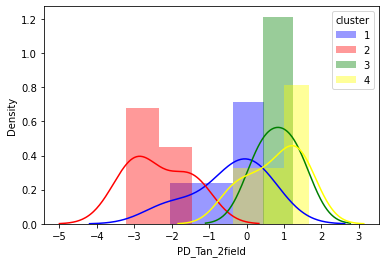

In [21]:
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(data_1[data_1.hc_cluster == 1]["PD_Tan_2field"], 
             color="blue", label=1)

sns.distplot(data_1[data_1.hc_cluster == 2]["PD_Tan_2field"], 
             color="red", label=2)

sns.distplot(data_1[data_1.hc_cluster == 3]["PD_Tan_2field"], 
             color="green", label=3)

sns.distplot(data_1[data_1.hc_cluster == 4]["PD_Tan_2field"], 
             color="yellow", label=4)

plt.legend(title="cluster")
plt.show()

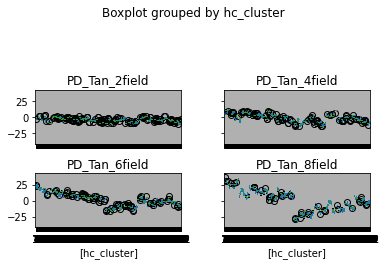

In [22]:
#시각화2
import matplotlib.pyplot as plt
data_1.boxplot(by='hc_cluster')
plt.tight_layout(pad=3, h_pad=1)
plt.show()

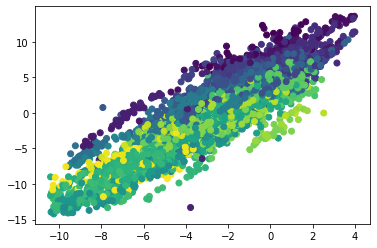

In [23]:
# 시각화 3
plt.scatter(x=data_1['PD_Tan_2field'], y=data_1['PD_Tan_4field'], c=data_1['hc_cluster']) # 각 cluster 좌푯값 시각화

#hc_centers = np.array(cluster_g.mean()) # 각 cluster별 centroid
#plt.scatter(x=hc_centers[:,1], y=hc_centers[:,4], marker='D', c='r') # 각 cluster별 centroid 시각화
# marker='D', c='r' : 마커 모양은 Diamond, 색깔은 red
plt.show()

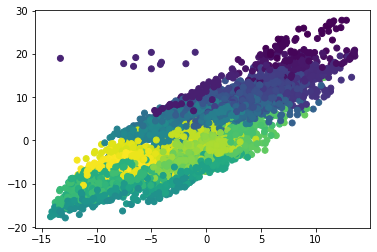

In [24]:
plt.scatter(x=data_1['PD_Tan_4field'], y=data_1['PD_Tan_6field'], c=data_1['hc_cluster'])

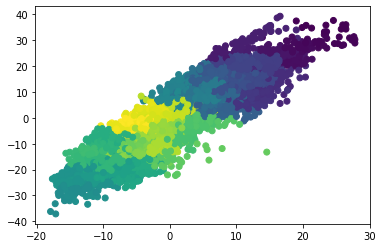

In [25]:
plt.scatter(x=data_1['PD_Tan_6field'], y=data_1['PD_Tan_8field'], c=data_1['hc_cluster'])

In [26]:
# 실루엣 스코어 확인
from sklearn.metrics import silhouette_samples, silhouette_score
score_samples = silhouette_samples(data_1, data_1['hc_cluster'])

data_1['silhouette_coeff'] = score_samples
average_score = silhouette_score(data_1, data_1['hc_cluster'])
print('데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

데이터셋 Silhouette Analysis Score:0.351


In [27]:
# 군집별 평균 silhouette_score 값
data_1.groupby('hc_cluster')['silhouette_coeff'].mean()

hc_cluster
1      0.404125
2      0.528920
3      0.176827
4      0.387209
5      0.522092
         ...   
338    0.420350
339    0.443680
340    0.308103
341    0.325424
342    0.408656
Name: silhouette_coeff, Length: 342, dtype: float64

## k-means Clustering

In [28]:
data_2

,PD_Tan_2field,PD_Tan_4field,PD_Tan_6field,PD_Tan_8field,hc_cluster,silhouette_coeff
0,-4.500,-0.650,4.475,8.250,131,0.246346
1,-4.350,-0.025,5.625,10.625,130,0.343935
4,-3.925,-0.275,3.475,6.125,135,0.448803
5,-4.225,-0.700,4.750,11.225,132,0.369492
6,-4.300,-0.250,4.775,9.700,131,0.161117
...,...,...,...,...,...,...
36893,-3.850,4.825,14.800,19.750,62,0.205514
37012,1.500,7.850,4.050,4.925,104,0.333108
37113,-0.075,5.400,-0.700,-13.100,254,0.329008
37152,-0.600,3.775,-3.900,-18.250,210,0.293782


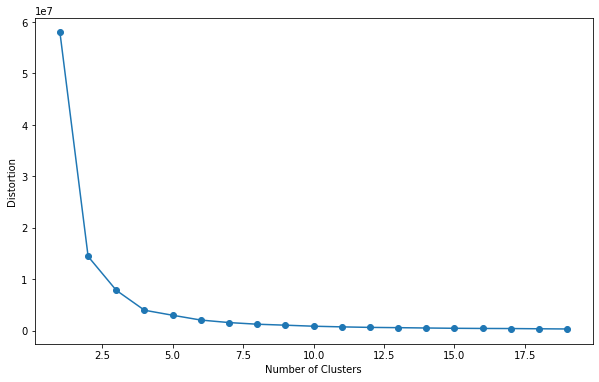

In [29]:
from sklearn.cluster import KMeans
# graph를 통해 k값 선정
# distortion = 군집내 오차제곱합(SSE; Sum of Suqared Errors)
distortions = []
for i in range(1,20):
    km = KMeans(
    n_clusters= i, init='random',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=0
    )
    km.fit(data_2) # elbow 계산할 dataset 적기
    # inertia는 군집내 분산을 의미
    distortions.append(km.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(1,20), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

In [30]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5, random_state=20210330, algorithm='auto')
# n_clusters=4 : 군집의 개수 (k)
# random_state=20210330 : seed 역할 (모델을 일정하게 생성 = 랜덤X)
model.fit(data_2)

KMeans(n_clusters=5, random_state=20210330)

In [31]:
# 각 군집(cluster) 표시
pred = model.predict(data_2)
pred

array([4, 4, 4, ..., 2, 1, 0])

In [32]:
# 4. 원형 데이터에 군집 예측치 추가
data_2['k_means_cluster'] = pred
data_2

,PD_Tan_2field,PD_Tan_4field,PD_Tan_6field,PD_Tan_8field,hc_cluster,silhouette_coeff,k_means_cluster
0,-4.500,-0.650,4.475,8.250,131,0.246346,4
1,-4.350,-0.025,5.625,10.625,130,0.343935,4
4,-3.925,-0.275,3.475,6.125,135,0.448803,4
5,-4.225,-0.700,4.750,11.225,132,0.369492,4
6,-4.300,-0.250,4.775,9.700,131,0.161117,4
...,...,...,...,...,...,...,...
36893,-3.850,4.825,14.800,19.750,62,0.205514,0
37012,1.500,7.850,4.050,4.925,104,0.333108,4
37113,-0.075,5.400,-0.700,-13.100,254,0.329008,2
37152,-0.600,3.775,-3.900,-18.250,210,0.293782,1


In [33]:
cluster1=data_2[data_2['k_means_cluster'] == 0]
cluster2=data_2[data_2['k_means_cluster'] == 1]
cluster3=data_2[data_2['k_means_cluster'] == 2]
cluster4=data_2[data_2['k_means_cluster'] == 3]
cluster5=data_2[data_2['k_means_cluster'] == 4]
cluster1.to_csv('cluster1.csv', index=False)
cluster2.to_csv('cluster2.csv', index=False)
cluster3.to_csv('cluster3.csv', index=False)
cluster4.to_csv('cluster4.csv', index=False)
cluster5.to_csv('cluster5.csv', index=False)
data_2.to_csv('cluster_data.csv', index=False)

In [34]:
# 군집별 centroid
centers = model.cluster_centers_
centers

array([[ -1.05625698,   4.74058659,  11.58493017,  16.51349162,
         65.38100559,   0.36791115],
       [ -5.40083176,  -6.17010358,  -8.95351538, -17.31944444,
        205.30069052,   0.37030063],
       [ -2.72297911,  -0.84146231,  -2.35667575, -10.01489555,
        269.56857402,   0.34051469],
       [ -4.54901551,  -3.33735084,  -1.90542959,  -3.55444511,
        315.88663484,   0.36318617],
       [ -3.14832011,   0.35223545,   5.81212963,   9.39756614,
        130.83597884,   0.32113475]])

In [35]:
pd.DataFrame(centers)
#0: Neuroticism
#1: Extraversion
#2: Conscientiousness
#3: Agreeableness
#4: Openess

,0,1,2,3,4,5
0,-1.056257,4.740587,11.584930,16.513492,65.381006,0.367911
1,-5.400832,-6.170104,-8.953515,-17.319444,205.300691,0.370301
2,-2.722979,-0.841462,-2.356676,-10.014896,269.568574,0.340515
3,-4.549016,-3.337351,-1.905430,-3.554445,315.886635,0.363186
4,-3.148320,0.352235,5.812130,9.397566,130.835979,0.321135


In [36]:
# 군집별 통계(평균)
cluster_k = data_2.groupby('k_means_cluster')
cluster_k.median()

,PD_Tan_2field,PD_Tan_4field,PD_Tan_6field,PD_Tan_8field,hc_cluster,silhouette_coeff
k_means_cluster,,,,,,
0,-1.175,5.2000,11.1125,15.9375,73.0,0.387871
1,-5.625,-6.3750,-8.8750,-17.7000,206.0,0.391332
2,-2.950,-1.4500,-3.2000,-11.1250,271.0,0.358473
3,-4.450,-2.6625,-1.9500,-3.4750,314.0,0.383174
4,-3.125,0.6000,5.9750,9.3500,132.5,0.333999


In [37]:
# 군집별 통계(표준편차)
cluster_k.std()

,PD_Tan_2field,PD_Tan_4field,PD_Tan_6field,PD_Tan_8field,hc_cluster,silhouette_coeff
k_means_cluster,,,,,,
0,2.236771,3.380884,3.712776,5.893551,24.909699,0.159210
1,2.640096,4.119371,3.278849,5.544986,19.003685,0.156695
2,2.036724,2.947355,3.710636,4.992112,14.148115,0.147476
3,2.127556,3.592903,3.079835,5.482839,15.111384,0.157183
4,2.027235,3.339457,2.489786,3.859016,17.105891,0.159015


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

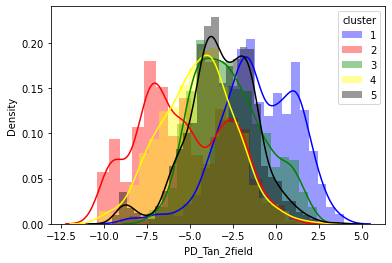

In [38]:
# 시각화 1
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(data_2[data_2.k_means_cluster == 0]["PD_Tan_2field"], 
             color="blue", label=1)

sns.distplot(data_2[data_2.k_means_cluster == 1]["PD_Tan_2field"], 
             color="red", label=2)

sns.distplot(data_2[data_2.k_means_cluster == 2]["PD_Tan_2field"], 
             color="green", label=3)

sns.distplot(data_2[data_2.k_means_cluster == 3]["PD_Tan_2field"], 
             color="yellow", label=4)

sns.distplot(data_2[data_2.k_means_cluster == 4]["PD_Tan_2field"], 
             color="black", label=5)

plt.legend(title="cluster")
plt.show()

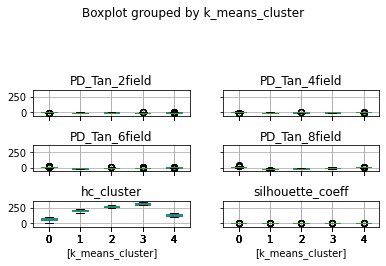

In [39]:
# 시각화 2
import matplotlib.pyplot as plt
data_2.boxplot(by='k_means_cluster')
plt.tight_layout(pad=3, h_pad=1)
plt.show()

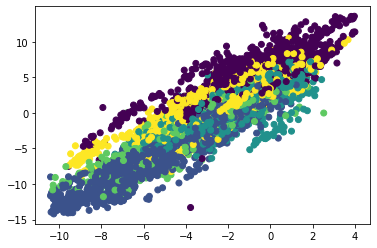

In [40]:
# 군집결과 시각화
plt.scatter(x=data_2['PD_Tan_2field'], y=data_2['PD_Tan_4field'], c=data_2['k_means_cluster'])

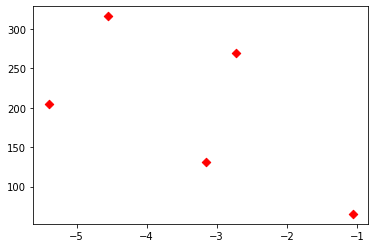

In [41]:
# 군집별 중앙값 시각화
plt.scatter(x=centers[:,0], y=centers[:,4], marker='D', c='r') # x, y는 각각 factor 1번째(0)와 4번째(3)
# marker='D', c='r' : 마커 모양은 Diamond, 색깔은 red
plt.show()

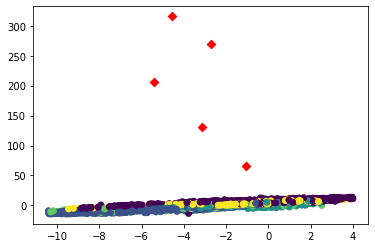

In [42]:
# 군집결과와 중앙값 함께 시각화

plt.scatter(x=data_2['PD_Tan_2field'], y=data_2['PD_Tan_4field'], c=data_2['k_means_cluster']) 

plt.scatter(x=centers[:,0], y=centers[:,4], marker='D', c='r')
plt.show()

In [43]:
# 실루엣 스코어
from sklearn.metrics import silhouette_samples, silhouette_score
k_score_samples = silhouette_samples(data_2, data_2['k_means_cluster'])

data_2['k_silhouette_coeff'] = k_score_samples
k_average_score = silhouette_score(data_2, data_2['k_means_cluster'])
print('데이터셋 Silhouette Analysis Score:{0:.3f}'.format(k_average_score))

데이터셋 Silhouette Analysis Score:0.552


In [44]:
# 군집별 평균 silhouette_score 값
data_2.groupby('k_means_cluster')['k_silhouette_coeff'].mean()

k_means_cluster
0    0.515222
1    0.553090
2    0.532805
3    0.519313
4    0.610714
Name: k_silhouette_coeff, dtype: float64